In [91]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
# import xesmf as xe

In [31]:
# F45 global grid
# file_base = "ERP_D_Ld9.f45_f45_mg37.I2000Clm50FatesCruRsGs.cheyenne_intel.clm-FatesCold.pr1005-disp_on-erp-f45-nodenscount-int.clm2.h0.2000-01-01-00000.nc.base"
# file_rest = "ERP_D_Ld9.f45_f45_mg37.I2000Clm50FatesCruRsGs.cheyenne_intel.clm-FatesCold.pr1005-disp_on-erp-f45-nodenscount-int.clm2.h0.2000-01-01-00000.nc.rest"

# Amazon 5x5
file_base = "ERP_D_Ld9.5x5_amazon.I2000Clm50FatesCruRsGs.cheyenne_intel.clm-FatesCold.pr1005-disp_on-erp-amz5x5-direct_noneigh-int.clm2.h0.2000-01-01-00000.nc.base"
file_rest = "ERP_D_Ld9.5x5_amazon.I2000Clm50FatesCruRsGs.cheyenne_intel.clm-FatesCold.pr1005-disp_on-erp-amz5x5-direct_noneigh-int.clm2.h0.2000-01-01-00000.nc.rest"

In [4]:
ds_base = xr.open_dataset(file_base)
ds_rest = xr.open_dataset(file_rest)

In [69]:
pft_idx = 0
seedin_rest = ds_rest.FATES_SEEDS_IN_GRIDCELL_PF.isel(fates_levpft=pft_idx)
seedin_base = ds_base.FATES_SEEDS_IN_GRIDCELL_PF.isel(fates_levpft=pft_idx)
seedin_rest_pftsum = ds_rest.FATES_SEEDS_IN_GRIDCELL_PF.sum(dim='fates_levpft')
seedin_base_pftsum = ds_base.FATES_SEEDS_IN_GRIDCELL_PF.sum(dim='fates_levpft')

In [183]:
def GCIndexAnnotate(ax):
    xlat = ds_base.lat.data
    xlon = ds_base.lon.data
    for a in range(len(ax)):
        k = 1
        for i in range(len(xlon)):
            for j in range(len(xlat)):
                ax[a].annotate(str(k),(xlon[i],xlat[j]))
                k += 1 

## Rest - Base post restart

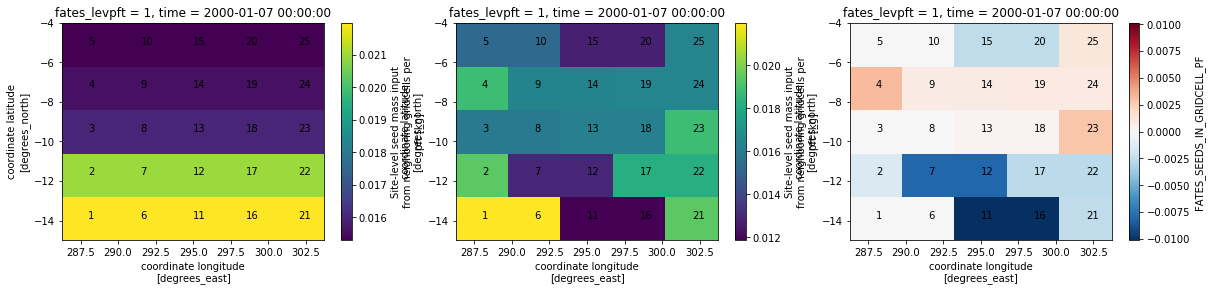

In [184]:
time_idx = 6
fig, axs = plt.subplots(ncols=3,figsize=(20,4))
seedin_base.isel(time=time_idx).plot(ax=axs[0])
seedin_rest.isel(time=time_idx).plot(ax=axs[1])
diff_seed = seedin_rest.isel(time=time_idx)-seedin_base.isel(time=time_idx)
diff_seed.plot(ax=axs[2])
GCIndexAnnotate(axs)

## Base before and after restart

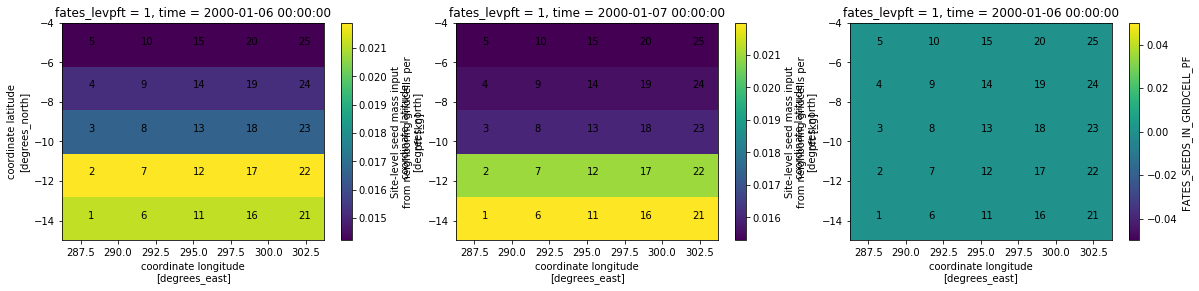

In [185]:
time_idx = 5
fig, axs = plt.subplots(ncols=3,figsize=(20,4))
seedin_base.isel(time=time_idx).plot(ax=axs[0])
seedin_base.isel(time=time_idx+1).plot(ax=axs[1])
diff_seed = seedin_rest.isel(time=time_idx)-seedin_base.isel(time=time_idx)
diff_seed.plot(ax=axs[2])
GCIndexAnnotate(axs)

## Rest before and after restart

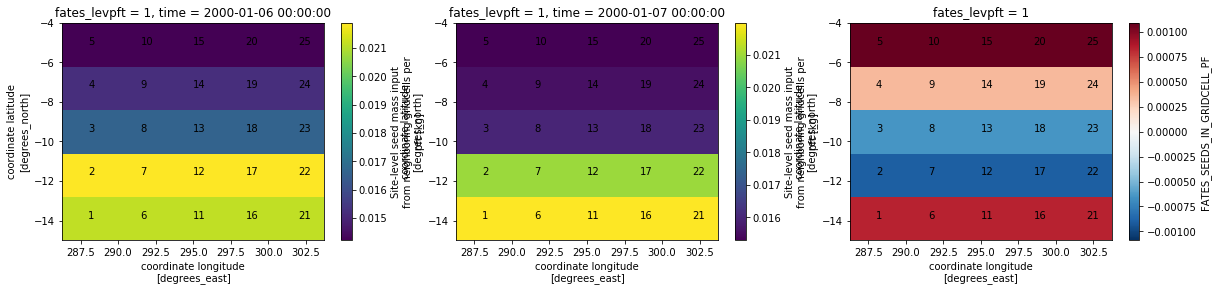

In [186]:
time_idx = 5
fig, axs = plt.subplots(ncols=3,figsize=(20,4))
seedin_base.isel(time=time_idx).plot(ax=axs[0])
seedin_base.isel(time=time_idx+1).plot(ax=axs[1])
diff_seed = seedin_base.isel(time=time_idx+1)-seedin_base.isel(time=time_idx)
diff_seed.plot(ax=axs[2])
GCIndexAnnotate(axs)

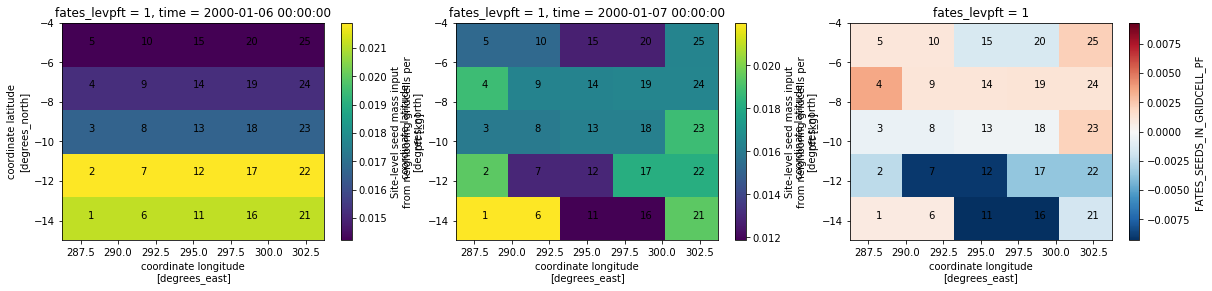

In [188]:
time_idx = 5
fig, axs = plt.subplots(ncols=3,figsize=(20,4))
seedin_rest.isel(time=time_idx).plot(ax=axs[0])
seedin_rest.isel(time=time_idx+1).plot(ax=axs[1])
diff_seed = seedin_rest.isel(time=time_idx+1)-seedin_rest.isel(time=time_idx)
diff_seed.plot(ax=axs[2])
GCIndexAnnotate(axs)